# ANN Intro extended

This NB is constructed such that it also runs in reasonable time on Laptop CPUs (e.g. an i3)

It builds on the NB from the last practical.

## Local Setup

There are different options to set up the TensorFlow library (which now includes [Keras](https://keras.io) as backend library) on your own computer. The simplest of them is using only the CPU and can be installed in 1 command via [`conda`](https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/), in an anaconda shell run:

```
conda install tensorflow
```

**NOTE**: TF migth not be compatible with your current environment, so here we create a [new environment](https://conda.io/docs/user-guide/tasks/manage-environments.html#creating-an-environment-with-commands) first:

```
conda create -n tf tensorflow
conda activate tf
```

In that case you need to install jupyter, scikit-learn, matplotlib, numpy and pandas in that environment again, with e.g.:

```
conda install jupyter scikit-learn matplotlib numpy pandas
```

(If you have a [supported Nvidia graphics card](https://developer.nvidia.com/cuda-gpus) in your machine and would like to use it for accelerated network training, make sure to follow [this guide](https://www.tensorflow.org/install/gpu) to install required packages and finally use the `tensorflow-gpu` library.)

The usage of the TensorFlow library in Python will be the same for CPU and GPU.

In [1]:
## fetch MNIST dataset (as done in last NB)
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
## Scale the input data into the range [0, 1]
## use sklearn's train_test_split to split the data into 
## 50000 instances for training, 10000 for validation and 10000 for testing
from sklearn.model_selection import train_test_split

X= mnist.data
X= X / 255.0
print(X.max())
y= mnist.target

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=10000, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=10000, random_state=42)

X_train.shape

1.0


(50000, 784)

Now it's time to test your TensorFlow installation by importing the package. The following code cell should execute without errors:

In [3]:
import tensorflow as tf

Now let's check which computing devices TensorFlow has found on this machine. If you don't have the GPU setup on your computer, the list should just contain one CPU: `/device:CPU:0` 

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14076270744688629216
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 2875835208630226592
physical_device_desc: "device: XLA_CPU device"
]


The cell below creates a similar MLP as above using tf.keras, see also this [tutorial network](https://github.com/keras-team/keras/blob/fcc0bfa354c5a47625d681d0297a66ef9ff43a9e/examples/mnist_mlp.py) which also uses the MNIST dataset.

Keras has a nice method `model.summary()` that prints a tabular overview of your network architecture, together with the input/output dimensions and number of parameters for each layer.

In [15]:
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

batch_size = 100
num_classes = 10
epochs = 100

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

## convert class vectors to binary class matrices
y_train_c = keras.utils.to_categorical(y_train, num_classes)
y_val_c = keras.utils.to_categorical(y_val, num_classes)
y_test_c = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(784,)))
model.add(Dense( 50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_c,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_val, y_val_c))

2.3.0
2.4.0
50000 train samples
10000 test samples
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_13 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
500/500 [==============================] - 2s 5ms/step - loss: 0.3582 - accuracy: 0.8986 - val_loss: 0.1945 - val_accuracy: 0.9431
Epoch 2/100
500/500 [==============================] - 2s 4ms/step - loss: 0.1535 - accuracy: 0.9545 - val_loss: 0.1286 - val_accuracy: 0.9615
Epoch 3/100
500/500 [======================

500/500 [==============================] - 2s 4ms/step - loss: 2.5511e-05 - accuracy: 1.0000 - val_loss: 0.1477 - val_accuracy: 0.9794
Epoch 53/100
500/500 [==============================] - 2s 4ms/step - loss: 2.1707e-05 - accuracy: 1.0000 - val_loss: 0.1489 - val_accuracy: 0.9794
Epoch 54/100
500/500 [==============================] - 2s 4ms/step - loss: 1.9118e-05 - accuracy: 1.0000 - val_loss: 0.1498 - val_accuracy: 0.9793
Epoch 55/100
500/500 [==============================] - 2s 4ms/step - loss: 1.6239e-05 - accuracy: 1.0000 - val_loss: 0.1518 - val_accuracy: 0.9791
Epoch 56/100
500/500 [==============================] - 2s 4ms/step - loss: 1.3568e-05 - accuracy: 1.0000 - val_loss: 0.1526 - val_accuracy: 0.9789
Epoch 57/100
500/500 [==============================] - 2s 4ms/step - loss: 1.2598e-05 - accuracy: 1.0000 - val_loss: 0.1555 - val_accuracy: 0.9790
Epoch 58/100
500/500 [==============================] - 2s 4ms/step - loss: 1.0490e-05 - accuracy: 1.0000 - val_loss: 0.1566 

In [16]:
score = model.evaluate(X_test, y_test_c, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2076595425605774
Test accuracy: 0.9760000109672546


You should see the training going through the epochs and in the end the trained network is evaluated on the test set. 
It shoud reach at least a classification accurary of 97% on the test set.

If you are interested, there is a special [intro to Keras for engineers](https://keras.io/getting_started/intro_to_keras_for_engineers/)

### Exercise 1

Create a visualization of the model architecture (graph) of the keras model composed above using [`plot_model`](https://keras.io/api/utils/model_plotting_utils/). You will probably need to install `pydot`:

`conda install pydot`

As you can see [here](https://keras.io/guides/training_with_built_in_methods/#passing-data-to-multiinput-multioutput-models), ANN architectures can be more complex, like e.g. [GoogLeNet](https://miro.medium.com/max/2700/1*ZFPOSAted10TPd3hBQU8iQ.png).

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_13 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________
None


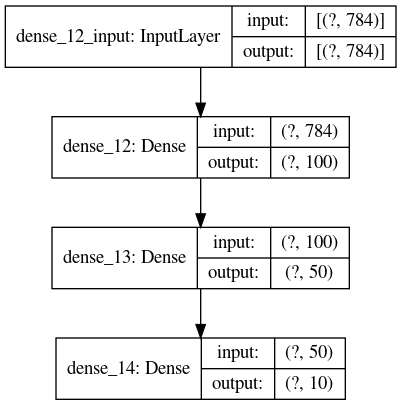

In [17]:
## print again the model summary (for easiy comparison with the following visualization)
print(model.summary())

## create a visualization of the model architecture (graph)
tf.keras.utils.plot_model(model, "model_1.png", show_shapes=True)

The methode [`fit`](https://keras.io/api/models/model_training_apis/#fit-method) from Keras yields a `history` objekt, which can be used to plot the loss and acc determined during training. This can be done quite selectively (see e.g. [here](https://www.kaggle.com/danbrice/keras-plot-history-full-report-and-grid-search)) or with just a few lines using [`pandas`](https://nbviewer.jupyter.org/github/ageron/handson-ml2/blob/92b5f83f8a/10_neural_nets_with_keras.ipynb#Building-an-Image-Classifier).

It is also possible to use [TensorBoard](https://www.tensorflow.org/tensorboard) for visualization but this can be more challanging to [get running](https://nbviewer.jupyter.org/github/ageron/handson-ml2/blob/92b5f83f8a/10_neural_nets_with_keras.ipynb#TensorBoard).

### Exercise 2

Plot the loss and accuracy of the train and the val set and save the plot as SVG

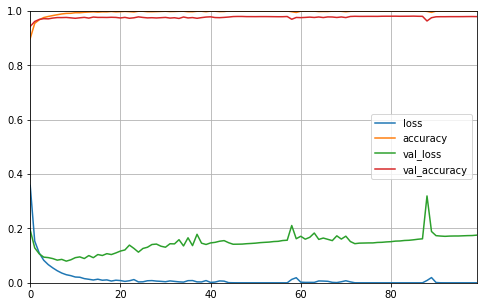

In [18]:
## plot loss and acc or the train and val set (hint: can be done with just 5 lines of code)
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("model_1_acclos.svg")
plt.show()

### Question 1

1. What could be the reason for peaks in the loss curves?
2. How could those peaks be avoided?

### Answers

1. Overfitting (kleine Batch_size)
2. Bei einer kleinen Batch_size werden weniger Trainigsdatenmengen zeitgleich verarbeitet, wodurch Fehler stärker hervor treten. Durch die Erhöhung der Batch_size wird die zeitgleich verarbeitete Trainingsdatenmenge größer und der durchschnittliche Fehler hat eine geringere Gewichtung im gesamten Trainingdatensatz. Jedoch wird das Netzwerk deutlich langsamer und schlechter Optimiert. Zusatzlich wird mehr Arbeitsspeicher für die höhere Datenmenge beim trainieren benötigt.

### Optional 1

If you have an idea how to avoid/reduce such peaks, try it out and plot the resulting curves again!

### Exercise 3

Now plot the loss and accuracy of the train and the test set (and save the plot as SVG) of your optimized model (from the last exercise of the last notebook), that should reach at least 98% accuracy.

In [9]:
## put the construction and training of your best model here:
batch_size = 100
num_classes = 10
epochs = 100

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

## convert class vectors to binary class matrices
y_train_c = keras.utils.to_categorical(y_train, num_classes)
y_val_c = keras.utils.to_categorical(y_val, num_classes)
y_test_c = keras.utils.to_categorical(y_test, num_classes)

model2 = Sequential()
model2.add(Dense(200, activation='relu', input_shape=(784,)))
model2.add(Dense(200, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

model2.summary()

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history2 = model2.fit(X_train, y_train_c,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_val, y_val_c))

50000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2010      
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
500/500 [==============================] - 4s 8ms/step - loss: 0.2812 - accuracy: 0.9181 - val_loss: 0.1515 - val_accuracy: 0.9544
Epoch 2/100
500/500 [==============================] - 3s 7ms/step - loss: 0.1119 - accuracy: 0.9661 - val_loss: 0.0987 - val_accuracy: 0.9691
Epoch 3/100
500/500 [==============================] 

In [13]:
## sorce your best model
score = model2.evaluate(X_test, y_test_c, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22478310763835907
Test accuracy: 0.9819999933242798


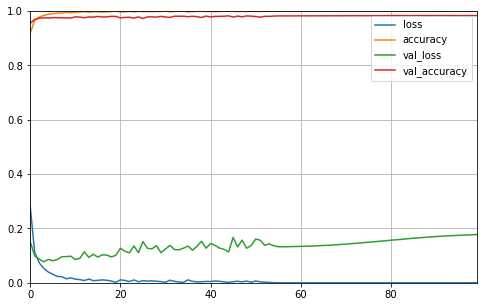

In [14]:
## plot loss and acc or the train and val set of your best model
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("Modell_2_acclos.svg")
plt.show()

### Question 2

Compare the two plots. 

1. What difference do you see? 
2. Can you explain them?

### Answers

1. Die *peaks* in den *loss* Graphen sind nun deutlich kleiner und sind ab 60 *epochs* ganz weg.
2. Erhöhung der Anzahl der Neuronen. Dadurch hat er mehr Möglichkeiten, seinen Wert zu berechnen. Das ist im Graph weiter unten an den fehlenden *peaks* zu sehen.

To use the model for "production" on a special device (e.g. cash mashine, mobile phone) or in a web service, the model needs to be exported and loaded on the target device.

### Exercise 5

Export your best model in H5 format and then load it again (as you would do on a target device) wiht a different name and test it by running predictions (scoring) on the test set.

In [12]:
## export model as H5
model2.save("model2.h5") 

## load model from H5 under different name
model3 = keras.models.load_model("model2.h5")

## sore the test set
score = model3.evaluate(X_test, y_test_c, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22478310763835907
Test accuracy: 0.9819999933242798


Model saving can also be used for `EarlyStopping`.

### Optional 2

Train your best model until it obviously overfits the validation data. Use an EarlyStopping callback to get the model when the validation loss/acc was best, following this [tutorial](https://nbviewer.jupyter.org/github/ageron/handson-ml2/blob/92b5f83f8a/10_neural_nets_with_keras.ipynb#10.).

Finally check how your best model performs on the (never seen) test set:

### Optional 3

To get a feeling how much work it is to create a training dataset, test the model prediction on some digits you wrote yourself!